In [1]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

load rnnSMAP


In [2]:
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0
)

load rnnSMAP


In [ ]:
opt['model'] = 'gru'
opt['out'] = 'gru'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.024400949478149414
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.016202926635742188
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.01606607437133789
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.015239953994750977
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.016330957412719727
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.015874147415161133
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.01579594612121582
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.018916845321655273
Epoch 1 Loss 0.429 time 5.35
Epoch 2 Loss 0.170 time 5.11
Epoch 3 Loss 0.156 time 4.84
Epoch 4 Loss 

Epoch 238 Loss 0.021 time 4.92
Epoch 239 Loss 0.019 time 4.66
Epoch 240 Loss 0.023 time 4.67
Epoch 241 Loss 0.019 time 4.66
Epoch 242 Loss 0.019 time 5.11
Epoch 243 Loss 0.023 time 4.75
Epoch 244 Loss 0.020 time 4.78
Epoch 245 Loss 0.021 time 4.71
Epoch 246 Loss 0.019 time 4.63
Epoch 247 Loss 0.021 time 4.67
Epoch 248 Loss 0.017 time 4.89
Epoch 249 Loss 0.021 time 4.67
Epoch 250 Loss 0.020 time 4.90
Epoch 251 Loss 0.018 time 5.10
Epoch 252 Loss 0.021 time 4.77
Epoch 253 Loss 0.018 time 4.79
Epoch 254 Loss 0.017 time 4.75
Epoch 255 Loss 0.022 time 4.65
Epoch 256 Loss 0.020 time 5.09
Epoch 257 Loss 0.020 time 5.16
Epoch 258 Loss 0.018 time 4.85
Epoch 259 Loss 0.019 time 4.74
Epoch 260 Loss 0.016 time 4.69
Epoch 261 Loss 0.022 time 4.75
Epoch 262 Loss 0.021 time 4.71
Epoch 263 Loss 0.017 time 5.03
Epoch 264 Loss 0.018 time 4.59
Epoch 265 Loss 0.018 time 4.69
Epoch 266 Loss 0.021 time 4.79
Epoch 267 Loss 0.019 time 4.71
Epoch 268 Loss 0.020 time 4.51
Epoch 269 Loss 0.018 time 4.65
Epoch 27

Exception in callback BaseAsyncIOLoop._handle_events(14, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(14, 1)>
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lo

In [3]:
out='gru'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [4]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.037203073501586914
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/gru/test_CONUSv16f1_2017_2017_ep500.csv


In [5]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015,2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.028234004974365234
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.04093313217163086
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/gru/test_CONUSv16f1_2015_2016_ep500.csv


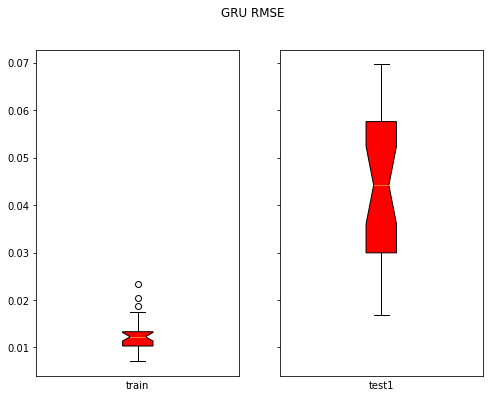

In [6]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test1'], title='GRU ' + strE)
print(statErr1)